In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ipywidgets as widgets
from scipy.spatial.transform import Rotation as R
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

1. Создайте функцию, которая в качестве аргумента принимает угол поворота и возвра
щает три матрицы элементарных поворотов вокруг осей координат. Можно возвращать
каждый раз все три матрицы¹
2. Нарисуйте параллелепипед в исходном положении и сверьтесь с Рис. 3.
3. С помощью матрицы Эйлера поверните его на 90° вокруг оси 𝑂𝑦. Матрицу Эйлера
получите с помощью своей функции, а также с помощью функции Rotation из модуля
spatial.transform библиотеки SciPy [8]. Проверьте, что результаты вашей функции и
функции Rotation совпадают.
4. Отобразите результат вращения, сверьтесь с рисунком Рис. 4. Распечатайте координаты
вершин и сверьте их с таблицей Таблица 3
¹Проверьте свое понимание и ответьте сами для себя о каких трех матрицах идет речь?
13
5. Аналогично, поверните параллелепипед вокруг 𝑂𝑥 на −90° используя свою функцию
и функцию Rotation, убедитесь, что результат одинаков. Нарисуйте получившийся
параллелепипед, убедитесь, что ваш рисунок совпадает с Рис. 5. Распечатайте коорди
наты вершин и сверьте их с таблицей Таблица 4.

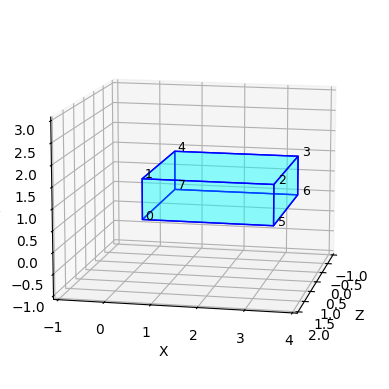

[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 3.  1.  0.]
 [ 3.  1. -2.]
 [ 0.  1. -2.]
 [ 3.  0.  0.]
 [ 3.  0. -2.]
 [ 0.  0. -2.]]


In [2]:
def osi(theta):
    a=np.radians(-theta)
    R_x=np.array([[1,0,0],[0, np.cos(a),np.sin(a)],[0,-np.sin(a),np.cos(a)]])
    R_y=np.array([[np.cos(a),0,-np.sin(a)],[0,1,0],[np.sin(a),0,np.cos(a)]])
    R_z=np.array([[np.cos(a),np.sin(a),0],[-np.sin(a), np.cos(a),0],[0,0,1]])
    return R_x, R_y, R_z




def draw():

    fig = plt.figure(num  = 0)
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.view_init(elev=12, azim=12, vertical_axis='y')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 3)
    ax.set_zlim(-1, 2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    x = points_rot[:, 0]
    y = points_rot[:, 1]
    z = points_rot[:, 2]

    ax.add_collection3d(Poly3DCollection(verts, facecolors='cyan', linewidths=1, edgecolors='b', alpha=.25))

    for i in range(len(vertices)):
        ax.text(x[i] + 0.15, y[i] + 0.1, z[i] + 0.2, str(i), fontsize=9)

    plt.show()

vertices = np.array([[0, 0, 0],
                    [0, 0, 1],
                    [3, 0, 1],
                    [3, 2, 1],
                    [0, 2, 1],
                    [3, 0, 0],
                    [3, 2, 0],
                    [0, 2, 0]])

points_rot = vertices @ osi(-90)[0].T

verts = [[points_rot[0], points_rot[1], points_rot[4], points_rot[7]],
    [points_rot[2], points_rot[5], points_rot[6], points_rot[3]],
    [points_rot[6], points_rot[7], points_rot[4], points_rot[3]],
    [points_rot[0], points_rot[1], points_rot[2], points_rot[5]],
    [points_rot[1], points_rot[2], points_rot[3], points_rot[4]],
    [points_rot[5], points_rot[6], points_rot[7], points_rot[0]]]



draw()

lala = np.round(points_rot, 0)
print(lala)



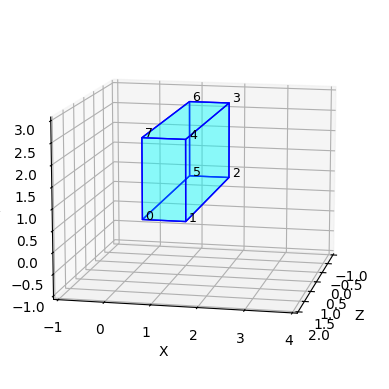

[[ 0.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0. -3.]
 [ 1.  2. -3.]
 [ 1.  2.  0.]
 [ 0.  0. -3.]
 [ 0.  2. -3.]
 [ 0.  2.  0.]]


In [3]:
r = R.from_euler('y', 90, degrees=True).as_matrix()
points_rot =vertices  @ r.T

verts = [[points_rot[0], points_rot[1], points_rot[4], points_rot[7]],
    [points_rot[2], points_rot[5], points_rot[6], points_rot[3]],
    [points_rot[6], points_rot[7], points_rot[4], points_rot[3]],
    [points_rot[0], points_rot[1], points_rot[2], points_rot[5]],
    [points_rot[1], points_rot[2], points_rot[3], points_rot[4]],
    [points_rot[5], points_rot[6], points_rot[7], points_rot[0]]]

draw()

lala = np.round(points_rot, 0)
print(lala)

plt.show()

1. Задайте единичный куб, то есть куб, у которого все ребра имеют единичную длину. Ко
ординаты вершин указанны в таблице Таблица 5. Отобразите куб с помощью Matplotlib
и сверьтес6.
2. Отобразите ось (прямую), которая проходит через начало координат и через самую
дальнюю от начала координат вершину куба. Что эта за вершина? Каков направляющий
вектор данной 
и?
14
3. С помощью матричного вида формулы Родрига задайте матрицу поворота вокруг это
оси на произвольный угол. Создайте ползунок, который может изменять этот угол от 0°
до 360° и вращая ползунок убедитесь, что куб вращается корректно.
4. Используйте функцию Rotation и сгенерируйте матрицу поворота вокруг той же оси.
Сравните с матрицей, которую вы получили с помощью формулы Родрига.
5. С помощью той же функции Rotation разложите данное вращение на элементарные
углы (углы Эйлера). Объясните математический и геометрический смысл данного дей
ствия

In [4]:
def Rodrig(vertices,theta):
    b=np.radians(-theta)
    a =  vertices[6]-vertices[0]
    length = np.linalg.norm(a)
    a = a / length
    A=np.array([[0,a[2],-a[1]],[-a[2],0,a[0]],[a[1],-a[0],0]])
    R=np.eye(3)+(np.sin(b)*A)+(1-np.cos(b))*(A@A)
    new_points=vertices@R.T                           
    return new_points

                         
def Dra(theta=0):
    fig=plt.figure(figsize=(8,8),dpi=100)
    ax=fig.add_subplot(1,1,1, projection='3d')
   

    vertices = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [1, 1, 0],
                    [1, 0, 0],
                    [0, 0, 1],
                    [0, 1, 1],
                    [1, 1, 1],
                    [1, 0, 1]])
    
    edges = [
        [0, 1], [0, 3], [0, 4], [1, 2], [1, 5],
        [2, 3], [2, 6], [3, 7], [4, 5],
        [4, 7], [5, 6], [6, 7]
    ]
    x1= vertices[:,0]
    y1= vertices[:,1]
    z1= vertices[:,2]
    ax.scatter(x1,y1,z1, marker='o',  color='black',  linewidth=2)
    for i in range(len(x1) ):
      ax.text(x1[i] + 0.15, y1[i] + 0.1,z1[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = vertices[edge[0]], vertices[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='black')
        

    dalnaa =  vertices[6]
    
    origin = np.array([0, 0, 0])
    axis_end = dalnaa*2 
 

    ax.plot([origin[0], axis_end[0]], [origin[1], axis_end[1]], [origin[2], axis_end[2]], 'g-', linewidth=2, label='Ось')
    

    points=Rodrig(vertices, theta)
    x= points[:,0]
    y= points[:,1]
    z= points[:,2]
    ax.scatter(x,y,z, marker='o',  color='blue',  linewidth=2)
    for i in range(len(x) ):
      ax.text(x[i] + 0.15, y[i] + 0.1,z[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = points[edge[0]], points[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='blue')
        

    dalnaa =  points[6]
    a = dalnaa -  points[0]
    origin = np.array([0, 0, 0])
    axis_end = a
 

    ax.plot([origin[0], axis_end[0]], [origin[1], axis_end[1]], [origin[2], axis_end[2]], 'g-', linewidth=2, label='Ось')
                   


    ax.view_init(elev=12, azim=20, vertical_axis='y') 

    
    ax.set_xlim([-0.5, 2])
    ax.set_ylim([-0.5, 2])
    ax.set_zlim([-0.5, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Куб')
    ax.set_aspect('equal')
    ax.grid(True)
    plt.show()

widgets.interactive(Dra, theta=(0,360,1))

interactive(children=(IntSlider(value=0, description='theta', max=360), Output()), _dom_classes=('widget-inter…

In [5]:
def Dra(theta=0):
    fig=plt.figure(figsize=(8,8),dpi=100)
    ax=fig.add_subplot(1,1,1, projection='3d')
   

    vertices = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [1, 1, 0],
                    [1, 0, 0],
                    [0, 0, 1],
                    [0, 1, 1],
                    [1, 1, 1],
                    [1, 0, 1]])
    
    edges = [
        [0, 1], [0, 3], [0, 4], [1, 2], [1, 5],
        [2, 3], [2, 6], [3, 7], [4, 5],
        [4, 7], [5, 6], [6, 7]
    ]
    x1= vertices[:,0]
    y1= vertices[:,1]
    z1= vertices[:,2]
    ax.scatter(x1,y1,z1, marker='o',  color='black',  linewidth=2)
    for i in range(len(x1) ):
      ax.text(x1[i] + 0.15, y1[i] + 0.1,z1[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = vertices[edge[0]], vertices[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='black')
        

    dalnaa =  vertices[6]
    origin = np.array([0, 0, 0])
    axis_end = dalnaa*2 
 

    ax.plot([origin[0], axis_end[0]], [origin[1], axis_end[1]], [origin[2], axis_end[2]], 'g-', linewidth=2, label='Ось')

    b=np.radians(theta)
    a =  vertices[6]
    length = np.linalg.norm(a)
    a = a / length
    

    r = R.from_rotvec(b * a) #R.from_rotvec(rad * a) создает объект поворота вокруг нормализованного вектора a на угол rad
    P = r.as_matrix() #преобразует объект поворота в матрицу поворота
    euler_angles = r.as_euler('xyz', degrees=True) # преобразует поворот в углы Эйлера (XYZ) в градусах

    points = vertices @ P.T
    x= points[:,0]
    y= points[:,1]
    z= points[:,2]
    ax.scatter(x,y,z, marker='o',  color='blue',  linewidth=2)
    for i in range(len(x) ):
      ax.text(x[i] + 0.15, y[i] + 0.1,z[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = points[edge[0]], points[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='blue')
        

    dalnaa =  points[6]
    a = dalnaa -  points[0]
    origin = np.array([0, 0, 0])
    axis_end = a
 

    ax.plot([origin[0], axis_end[0]], [origin[1], axis_end[1]], [origin[2], axis_end[2]], 'g-', linewidth=2, label='Ось')
                   


    ax.view_init(elev=12, azim=20, vertical_axis='y') 
    print(f'Углы Эйлера (XYZ): {euler_angles}')

    
    ax.set_xlim([-0.5, 2])
    ax.set_ylim([-0.5, 2])
    ax.set_zlim([-0.5, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Куб')
    ax.set_aspect('equal')
    ax.grid(True)
    plt.show()

widgets.interactive(Dra, theta=(0,360,1))

interactive(children=(IntSlider(value=0, description='theta', max=360), Output()), _dom_classes=('widget-inter…

1. Задайте пирамиду, с основанием в виде квадрата. Координаты вершин указанны в
таблице Таблица 6. Отобразите пирамиду с помощью Matplotlib и сверьтесь с Рис. 7.
2. Напишите программу, которая будет вращать данную пирамиду вокруг оси 𝑂𝑦 с помо
щью задания параметров Родрига–Гамильтона. Создайте ползунок, который изменяет
угол вращения 𝜃 от 0° до 360° и вращает пирамиду.
3. Напишите программу, которая будет вращать данную пирамиду вокруг оси проведен
ной от вершины 3 к вершине 1 с помощью кватернионов. Созд

In [6]:
def Gamilton(vertices,theta,a):
    b=np.radians(theta/2)
    a = a/np.linalg.norm(a)
    cos = np.cos(b/2)
    sin = np.sin(b/2)*a
    cross1 = np.cross(sin, vertices)
    cross2 = np.cross(sin, cross1)
    return vertices + 2 * cos * cross1 + 2 * cross2
    
    


def Drat(theta=0):
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(1,1,1, projection='3d')
    y=np.array([0,1,0])
    

    vertices = np.array([[1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, -1],
                    [1, 0, -1],
                    [0, 2, 0]])
    
    edges = [
        [0, 1], [0, 3], [0, 4], [1, 2], [1, 4],
        [2, 3], [3, 4]
    ]
    
    x1= vertices[:,0]
    y1= vertices[:,1]
    z1= vertices[:,2]
    ax.scatter(x1,y1,z1, marker='o',  color='black',  linewidth=2)
    for i in range(len(x1) ):
      ax.text(x1[i] + 0.15, y1[i] + 0.1,z1[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = vertices[edge[0]], vertices[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='black')

   
    # faces = [
    #     [0, 1, 2, 3],     
    #     [0, 1, 4],        
    #     [1, 2, 4],
    #     [2, 3, 4],
    #     [3, 0, 4]
    # ]
    # pyramid_faces = [[vertices[idx] for idx in face] for face in faces]
    # poly3d = Poly3DCollection(pyramid_faces, facecolors='lightblue', edgecolors='k', linewidths=1, alpha=0.7, zorder = 10)
    # ax.add_collection3d(poly3d)

    new_points = Gamilton(vertices,theta,y)
    x= new_points[:,0]
    y= new_points[:,1]
    z= new_points[:,2]
    ax.scatter(x,y,z, marker='o',  color='black',  linewidth=2)
    for i in range(len(x1) ):
      ax.text(x[i] + 0.15, y[i] + 0.1,z[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = new_points[edge[0]], new_points[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='black')

   
    faces = [
        [0, 1, 2, 3],     
        [0, 1, 4],        
        [1, 2, 4],
        [2, 3, 4],
        [3, 0, 4]
    ]
    pyramid_faces = [[new_points[idx] for idx in face] for face in faces]
    poly3d = Poly3DCollection(pyramid_faces, facecolors='lightblue', edgecolors='k', linewidths=1, alpha=0.5, zorder = 10)
    ax.add_collection3d(poly3d)
   


    ax.view_init(elev=18, azim=25, vertical_axis='y') 

    ax.quiver(0, 0, -1, 0, 0, 4, color='blue', linewidth=2, arrow_length_ratio=0.1,)
    ax.quiver(-1, 0, 0, 3, 0, 0, color='red', linewidth=3, arrow_length_ratio=0.1,zorder=1)
    ax.quiver(0, 0, 0, 0,3, 0, color='green', linewidth=2, arrow_length_ratio=0.1,zorder=1)

    
    ax.set_xlim([-2, 2])
    ax.set_ylim([-1, 3])
    ax.set_zlim([-2, 2])
    ax.set_box_aspect([1, 1.2, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Пирамида')
    ax.grid(True)
    plt.show()

widgets.interactive(Drat, theta=(0,720,1))

interactive(children=(IntSlider(value=0, description='theta', max=720), Output()), _dom_classes=('widget-inter…

In [7]:
def transformation(vertices,theta,a):
    a = a/np.linalg.norm(a)
    theta=np.radians(theta)
    # q0 = np.cos(theta / 2)+np.sin(theta/2)*a
    # q1 = -a[0] * (np.cos(theta / 2)+np.sin(theta/2)*a[0])
    # q2 = -a[1] * (np.cos(theta / 2)+np.sin(theta/2)*a[1])
    # q3 = -a[2] * (np.cos(theta / 2)+np.sin(theta/2)*a[2])

   
    q0 = np.cos(theta / 2)
    q1 = a[0] * np.sin(theta / 2)
    q2 = a[1] * np.sin(theta / 2)
    q3 = a[2] * np.sin(theta / 2)
    rotation_matrix=np.array([[2*(q0**2+q1**2)-1,2*(q1*q2+q0*q3),2*(q1*q3-q0*q2)],
                              [2*(q1*q2-q0*q3),2*(q0**2+q2**2)-1,2*(q2*q3+q0*q1)],
                              [2*(q1*q3+q0*q2),2*(q2*q3-q0*q1),2*(q0**2+q3**2)-1]])
    rotated_vertices = vertices@rotation_matrix.T

    return rotated_vertices

def Draft(theta=0):
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(1,1,1, projection='3d')
    y=np.array([0,1,0])
    

    vertices = np.array([[1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, -1],
                    [1, 0, -1],
                    [0, 2, 0]])
    
    edges = [
        [0, 1], [0, 3], [0, 4], [1, 2], [1, 4],
        [2, 3], [3, 4]
    ]
    
    x1= vertices[:,0]
    y1= vertices[:,1]
    z1= vertices[:,2]
    ax.scatter(x1,y1,z1, marker='o',  color='black',  linewidth=2)
    for i in range(len(x1) ):
      ax.text(x1[i] + 0.15, y1[i] + 0.1,z1[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = vertices[edge[0]], vertices[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='black')

    
    rotation_axis = vertices[3]-vertices[1]

    new_points=transformation(vertices,theta,rotation_axis)

    x= new_points[:,0]
    y= new_points[:,1]
    z= new_points[:,2]
    ax.scatter(x,y,z, marker='o',  color='black',  linewidth=2)
    for i in range(len(x1) ):
      ax.text(x[i] + 0.15, y[i] + 0.1,z[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = new_points[edge[0]], new_points[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='black')

   
    faces = [
        [0, 1, 2, 3],     
        [0, 1, 4],        
        [1, 2, 4],
        [2, 3, 4],
        [3, 0, 4]
    ]
    pyramid_faces = [[new_points[idx] for idx in face] for face in faces]
    poly3d = Poly3DCollection(pyramid_faces, facecolors='lightblue', edgecolors='k', linewidths=1, alpha=0.5, zorder = 10)
    ax.add_collection3d(poly3d)

   
   
   


    ax.view_init(elev=18, azim=25, vertical_axis='y') 

    ax.quiver(0, 0, -1, 0, 0, 4, color='blue', linewidth=2, arrow_length_ratio=0.1,)
    ax.quiver(-1, 0, 0, 3, 0, 0, color='red', linewidth=3, arrow_length_ratio=0.1,zorder=1)
    ax.quiver(0, 0, 0, 0,3, 0, color='green', linewidth=2, arrow_length_ratio=0.1,zorder=1)

    
    ax.set_xlim([-2, 2])
    ax.set_ylim([-1, 3])
    ax.set_zlim([-2, 2])
    ax.set_box_aspect([1, 1.2, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Пирамида')
    ax.grid(True)
    plt.show()

widgets.interactive(Draft, theta=(0,720,1))

interactive(children=(IntSlider(value=0, description='theta', max=720), Output()), _dom_classes=('widget-inter…

In [8]:
def transformate(vertices,theta,p,a):
    a = a/np.linalg.norm(a)
    theta=np.radians(theta)
    # q0 = np.cos(theta / 2)+np.sin(theta/2)*a
    # q1 = -a[0] * (np.cos(theta / 2)+np.sin(theta/2)*a[0])
    # q2 = -a[1] * (np.cos(theta / 2)+np.sin(theta/2)*a[1])
    # q3 = -a[2] * (np.cos(theta / 2)+np.sin(theta/2)*a[2])

    vertices = vertices - p   
    q0 = np.cos(theta / 2)
    q1 = a[0] * np.sin(theta / 2)
    q2 = a[1] * np.sin(theta / 2)
    q3 = a[2] * np.sin(theta / 2)
    rotation_matrix=np.array([[2*(q0**2+q1**2)-1,2*(q1*q2+q0*q3),2*(q1*q3-q0*q2)],
                              [2*(q1*q2-q0*q3),2*(q0**2+q2**2)-1,2*(q2*q3+q0*q1)],
                              [2*(q1*q3+q0*q2),2*(q2*q3-q0*q1),2*(q0**2+q3**2)-1]])
    rotated_vertices = vertices@rotation_matrix.T
    
    return rotated_vertices+p

def Draf(theta=0):
    fig=plt.figure(figsize=(8,8),dpi=100)
    ax=fig.add_subplot(1,1,1, projection='3d')
    y=np.array([0,1,0])
    

    vertices = np.array([[1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, -1],
                    [1, 0, -1],
                    [0, 2, 0]])
    
    edges = [
        [0, 1], [0, 3], [0, 4], [1, 2], [1, 4],
        [2, 3], [3, 4]
    ]
    
    x1= vertices[:,0]
    y1= vertices[:,1]
    z1= vertices[:,2]
    ax.scatter(x1,y1,z1, marker='o',  color='black',  linewidth=2)
    for i in range(len(x1) ):
      ax.text(x1[i] + 0.15, y1[i] + 0.1,z1[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = vertices[edge[0]], vertices[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='black')

    
    rotation_axis = vertices[3]
    y = np.array([0,1,0])

    new_points=transformate(vertices,theta,rotation_axis,y)

    x= new_points[:,0]
    y= new_points[:,1]
    z= new_points[:,2]
    ax.scatter(x,y,z, marker='o',  color='black',  linewidth=2)
    for i in range(len(x1) ):
      ax.text(x[i] + 0.15, y[i] + 0.1,z[i] + 0.2, str(i), fontsize=12)

    for edge in edges:
        p1, p2 = new_points[edge[0]], new_points[edge[1]]
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]],color='black')

   
    faces = [
        [0, 1, 2, 3],     
        [0, 1, 4],        
        [1, 2, 4],
        [2, 3, 4],
        [3, 0, 4]
    ]
    pyramid_faces = [[new_points[idx] for idx in face] for face in faces]
    poly3d = Poly3DCollection(pyramid_faces, facecolors='lightblue', edgecolors='k', linewidths=1, alpha=0.5, zorder = 10)
    ax.add_collection3d(poly3d)

   
   
   


    ax.view_init(elev=18, azim=25, vertical_axis='y') 

    ax.quiver(0, 0, -1, 0, 0, 4, color='blue', linewidth=2, arrow_length_ratio=0.1,)
    ax.quiver(-1, 0, 0, 3, 0, 0, color='red', linewidth=3, arrow_length_ratio=0.1,zorder=1)
    ax.quiver(0, 0, 0, 0,3, 0, color='green', linewidth=2, arrow_length_ratio=0.1,zorder=1)

    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-2, 4])
    ax.set_zlim([-3, 3])
    ax.set_box_aspect([1, 1.2, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Пирамида')
    ax.grid(True)
    plt.show()

widgets.interactive(Draf, theta=(0,720,1))

interactive(children=(IntSlider(value=0, description='theta', max=720), Output()), _dom_classes=('widget-inter…